In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
#We can see _c39 has all null values hence we can ignore the column
df=df.iloc[:,:-1]

In [6]:
#Police report available has "?" values that will have to preprocess

In [7]:
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].value_counts())

01-01-2006    3
05-08-1992    3
28-04-1992    3
24-06-1990    2
25-09-2001    2
             ..
29-05-2003    1
22-11-2008    1
29-02-1992    1
05-01-2014    1
08-06-2005    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [8]:
#incident type,property_damage contains '?' will be preprocessed

In [9]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

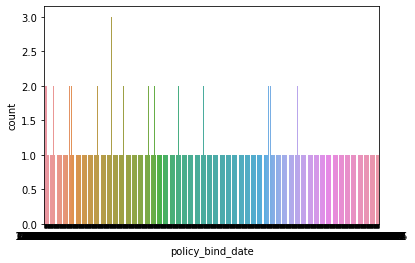

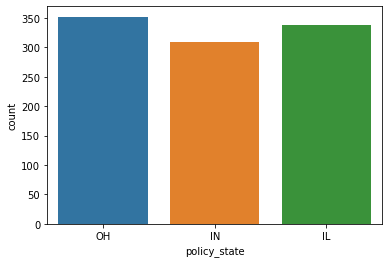

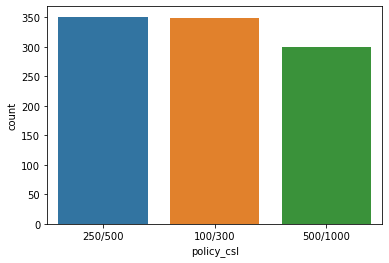

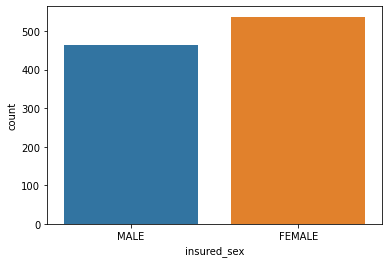

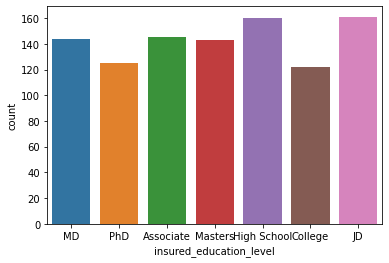

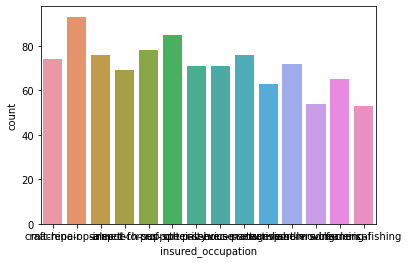

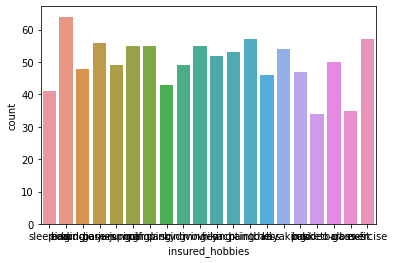

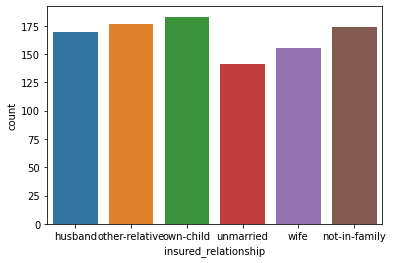

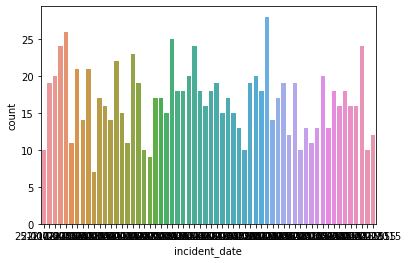

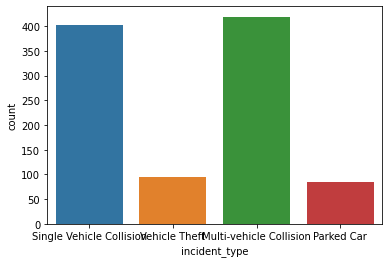

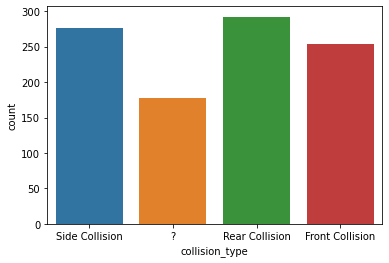

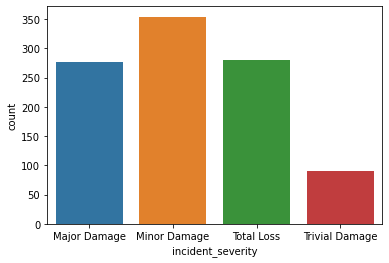

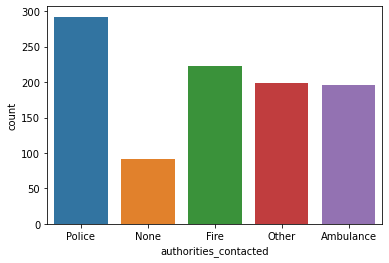

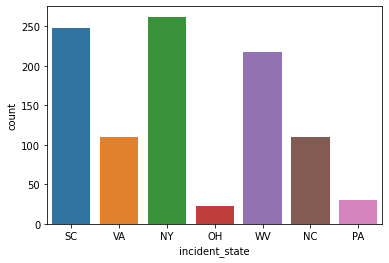

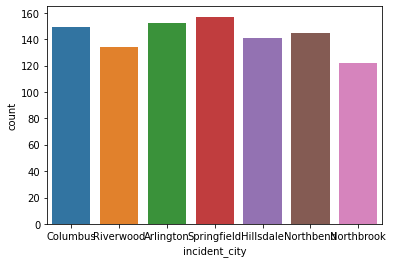

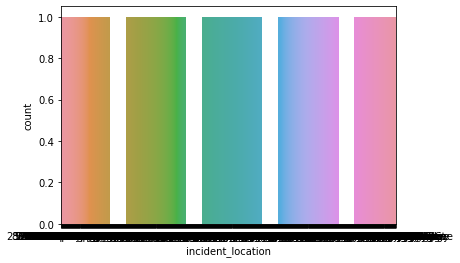

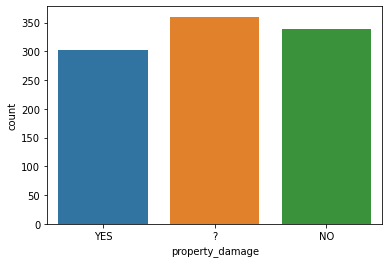

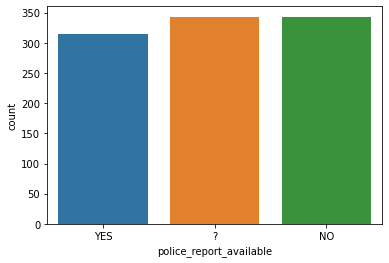

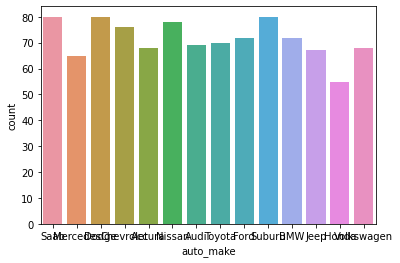

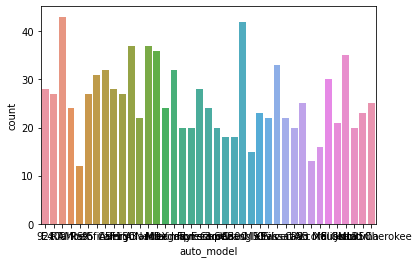

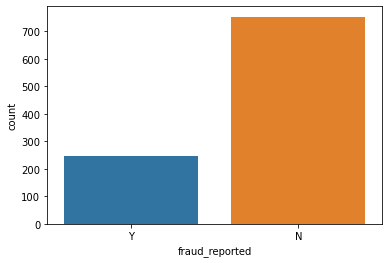

In [10]:
for i in df.columns:
    if df[i].dtype=='object':
        sns.countplot(df[i])
        plt.show()

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [12]:
#data is highly spread as std deviation for most columns are quite high

In [13]:
#seperating catagorical data columns and continuous data column

In [14]:
cat_cols=[]
con_cols=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_cols.append(i)
    else:
        con_cols.append(i)
print(cat_cols)
print(con_cols)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


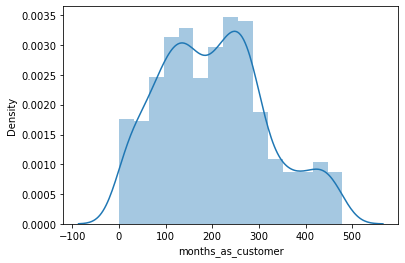

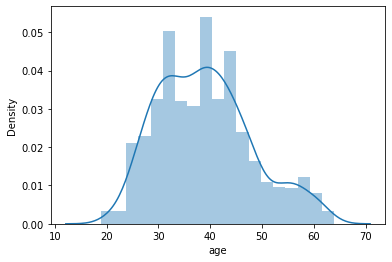

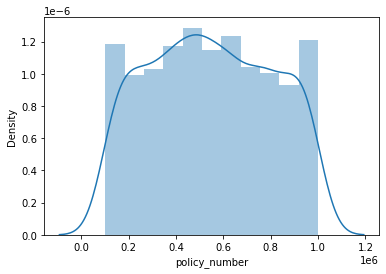

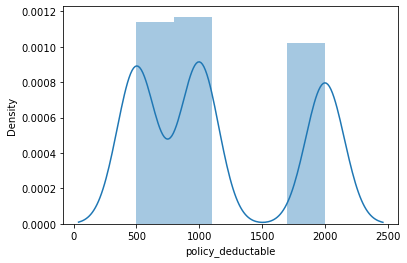

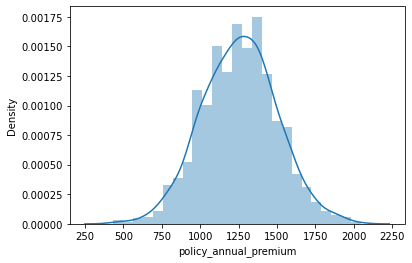

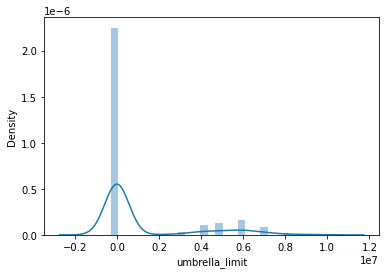

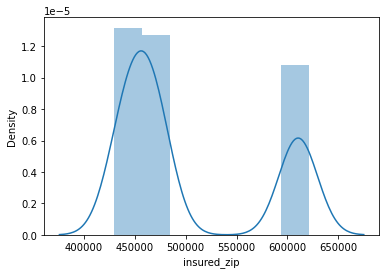

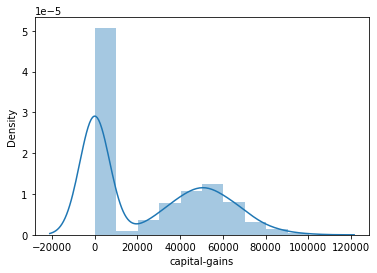

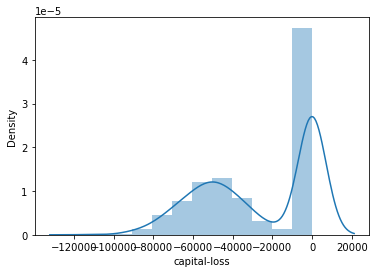

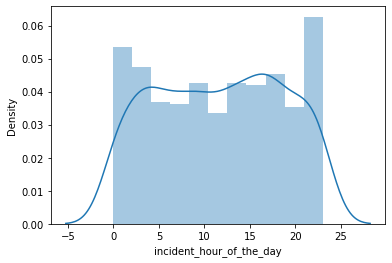

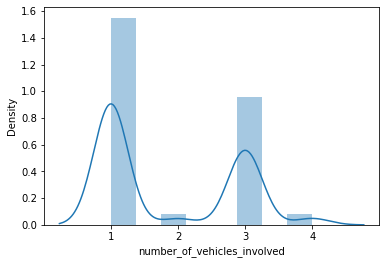

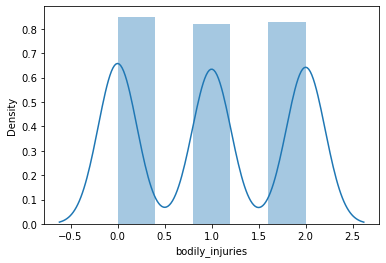

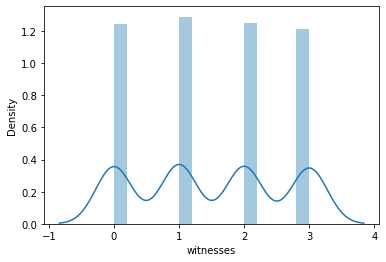

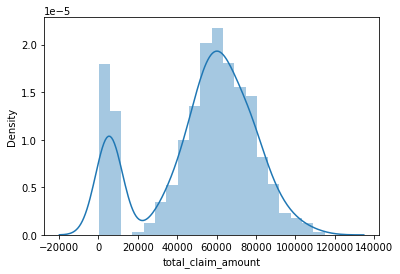

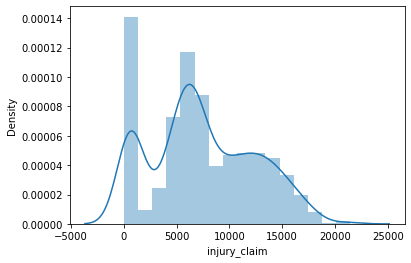

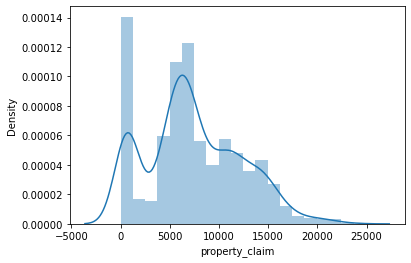

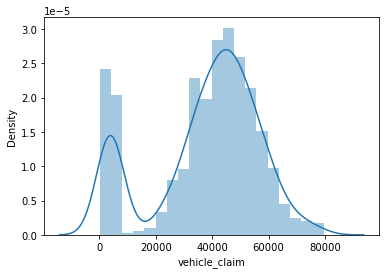

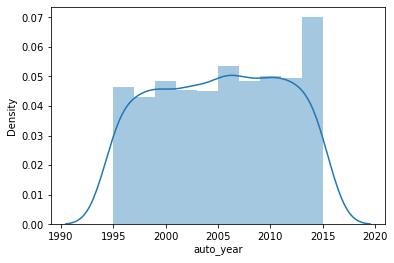

In [15]:
for i in con_cols:
    sns.distplot(df[i])
    plt.show()

In [16]:
#data is not normally distributed

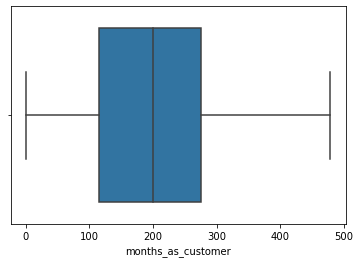

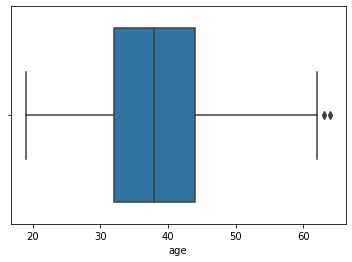

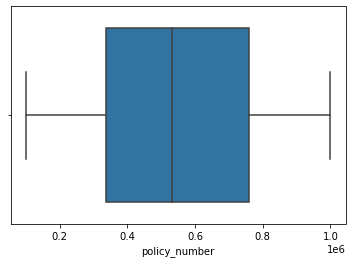

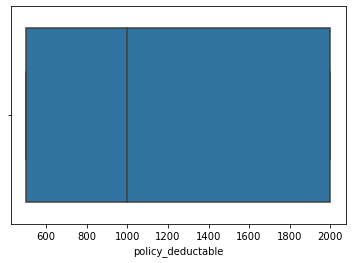

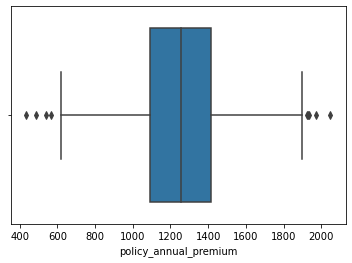

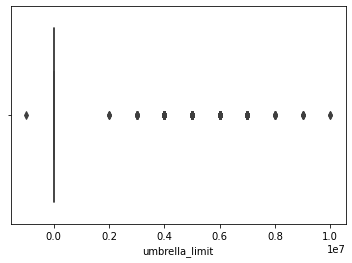

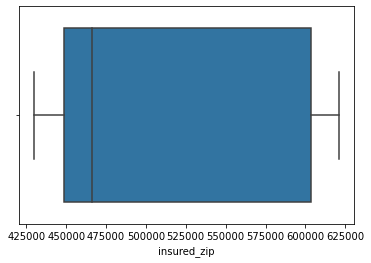

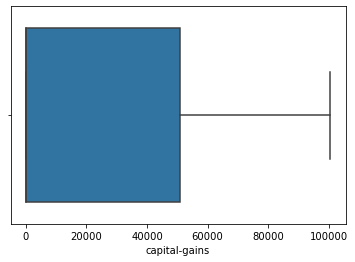

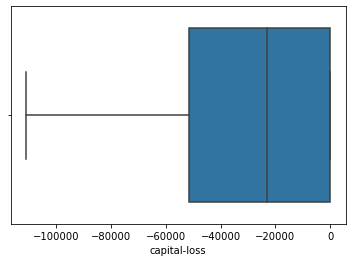

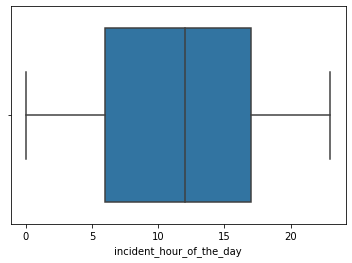

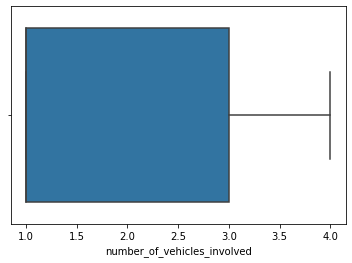

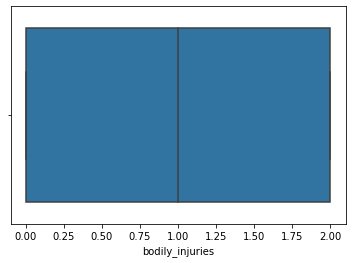

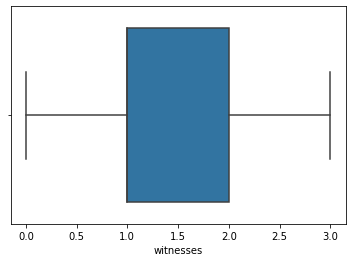

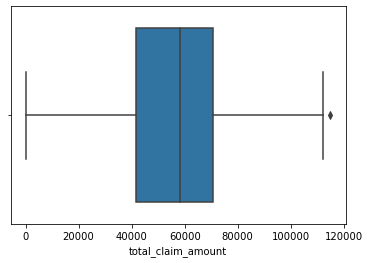

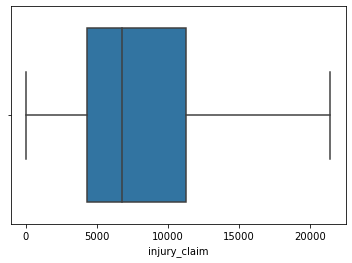

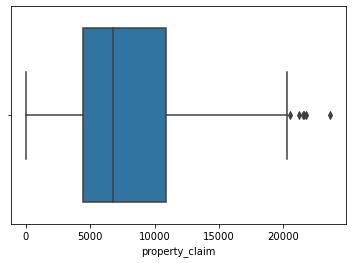

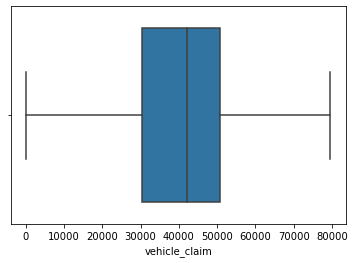

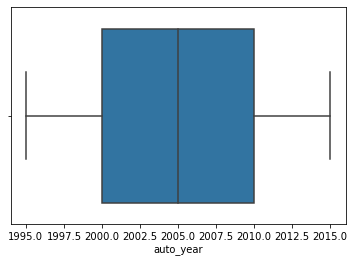

In [17]:
for i in con_cols:
    sns.boxplot(df[i])
    plt.show()

In [18]:
#there are a few outliers in the dataset

In [19]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [20]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


<AxesSubplot:>

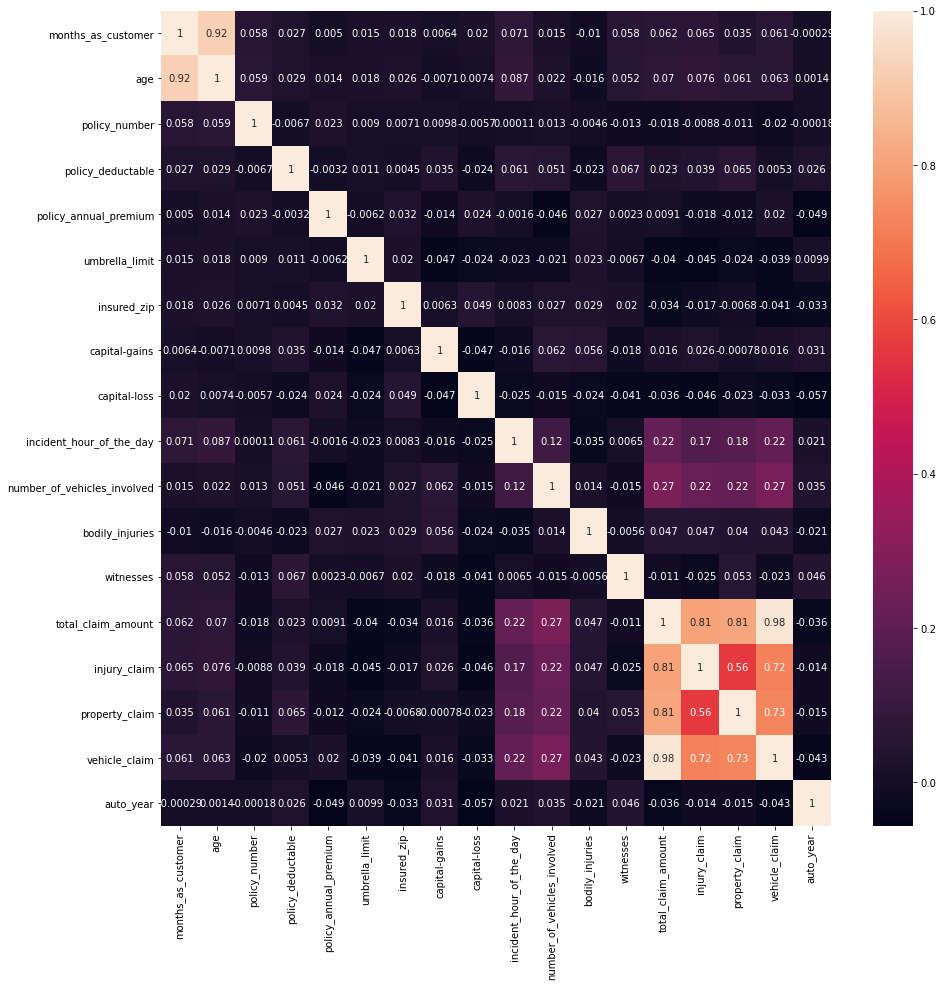

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [22]:
#months_as_customer and age are highly correlated

In [23]:
#all claim amounts are highly correlated

In [24]:
#policy bind date dosent seem to have much impact on the target variable,policy number is having all unique values can be dropped,insured_hobbies should not affect the data set,incident locations have all different values,

In [26]:
df.drop(['policy_bind_date','policy_number','insured_hobbies','incident_location'],axis=1,inplace=True)

In [27]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [39]:
from statistics import mode
for i in ['police_report_available','incident_type','property_damage']:
    print(df[i].value_counts())

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
?      360
NO     338
YES    302
Name: property_damage, dtype: int64


In [41]:
df['police_report_available']=df['police_report_available'].replace('?','NO')

In [43]:
df['collision_type'].value_counts()


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [44]:
df['collision_type']=df['collision_type'].replace('?','Rear Collision')

In [45]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [46]:
df['property_damage']=df['property_damage'].replace('?','NO')

In [47]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [48]:
cat_cols=[]
for i in df:
    if df[i].dtype=='object':
        cat_cols.append(i)

In [49]:
cat_cols

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [50]:
cat_cols.remove('incident_date')

In [52]:
df.drop(['incident_date'],axis=1,inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [54]:
#check multicolinearity
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as viff
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif['VIF Factor']=[viff(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [55]:
calc_vif(x)

,variables,VIF Factor
0,months_as_customer,28.256463
1,age,131.260457
2,policy_state,2.566212
3,policy_csl,2.456756
4,policy_deductable,4.610399
5,policy_annual_premium,28.417473
6,umbrella_limit,1.267429
7,insured_zip,51.124438
8,insured_sex,1.908250
9,insured_education_level,3.439427


In [56]:
#age and auto_year are very co-linear

In [57]:
df.drop(['auto_year','age'],axis=1,inplace=True)

In [59]:
calc_vif(df.iloc[:,:-1])

,variables,VIF Factor
0,months_as_customer,4.256663
1,policy_state,2.537487
2,policy_csl,2.444952
3,policy_deductable,4.517749
4,policy_annual_premium,24.742506
5,umbrella_limit,1.266385
6,insured_zip,35.619932
7,insured_sex,1.899612
8,insured_education_level,3.407427
9,insured_occupation,3.700441


In [60]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [61]:
for i in [3,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8]:
    df1=df.copy()
    df_new=df[(z<i).all(axis=1)]
    loss=((df1.shape[0]-df_new.shape[0])*100)/df1.shape[0]
    print ("At i",i," loss % is",loss)

At i 3  loss % is 2.0
At i 3.2  loss % is 1.0
At i 3.4  loss % is 0.7
At i 3.6  loss % is 0.2
At i 3.8  loss % is 0.2
At i 4.0  loss % is 0.0
At i 4.2  loss % is 0.0
At i 4.4  loss % is 0.0
At i 4.6  loss % is 0.0
At i 4.8  loss % is 0.0


In [62]:
df=df[(z<3).all(axis=1)]

In [63]:

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [64]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [65]:
x.shape,y.shape

((1480, 31), (1480,))

In [66]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for i in df.columns:
    if np.abs(df[i].skew())>0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))
    elif np.abs(df[i].skew())<-0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

In [67]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
lg=LogisticRegression()
x_train=x
y_train=y
x_test=x
y_test=y
acc=0
r_state=0
for i in (0,1000):
    tr_x,t_x,tr_y,t_y=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(tr_x,tr_y)
    pred=lg.predict(t_x)
    if accuracy_score(t_y,pred)>acc:
        acc=accuracy_score(t_y,pred)
        x_train=tr_x
        x_test=t_x
        y_train=tr_y
        y_test=t_y
        r_state=i
print("At random state",r_state,"accuracy score is maximum i.e.,",acc)

At random state 0 accuracy score is maximum i.e., 0.8141891891891891


In [70]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print("Accuracy score",accuracy_score(y_test,pred))
    print("Confusion Matrix\n",confusion_matrix(y_test,pred))
    print("Classification report\n",classification_report(y_test,pred))

In [134]:
fun(lg)

Accuracy score 0.8141891891891891
Confusion Matrix
 [[114  26]
 [ 29 127]]
Classification report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       140
           1       0.83      0.81      0.82       156

    accuracy                           0.81       296
   macro avg       0.81      0.81      0.81       296
weighted avg       0.81      0.81      0.81       296



In [72]:
from sklearn.model_selection import cross_val_score,KFold
def cvs(m):
    cv1=KFold(n_splits=5,shuffle=True)
    score=cross_val_score(m,x,y,cv=cv1,scoring='accuracy')
    print("Cross val score",score)
    print(score.mean())

In [73]:
from sklearn.model_selection import GridSearchCV
def hypertuning(params,model):
    gd=GridSearchCV(model,params,cv=5,scoring='accuracy')
    gd.fit(x,y)
    print(gd.best_params_)

In [135]:
cvs(lg)

Cross val score [0.75337838 0.79054054 0.8277027  0.76689189 0.81081081]
0.7898648648648648


In [203]:
acc=[81.41]
CVS=[78.99]
model=['Lgistic Regression']

In [76]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [78]:
from sklearn.svm import SVC
params_svc={
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svc,SVC())

{'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}


In [79]:
svc=SVC(degree=3,gamma='scale',kernel='poly',shrinking=True)

In [204]:
fun(svc)

Accuracy score 0.8378378378378378
Confusion Matrix
 [[113  27]
 [ 21 135]]
Classification report
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       140
           1       0.83      0.87      0.85       156

    accuracy                           0.84       296
   macro avg       0.84      0.84      0.84       296
weighted avg       0.84      0.84      0.84       296



In [206]:
cvs(svc)

Cross val score [0.75337838 0.81418919 0.80405405 0.85472973 0.84459459]
0.8141891891891891


In [207]:
CVS.append(81.41)
acc.append(83.78)
model.append('SVC')

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
params_dtc={'criterion':['gini','entropy'],'splitter':['random','best'],'max_depth':[10,20,30],'min_samples_split':[20,30,40]}
hypertuning(params_dtc,dtc)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 40, 'splitter': 'random'}


In [86]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=40,splitter='random')

In [145]:
fun(dtc)
cvs(dtc)

Accuracy score 0.8040540540540541
Confusion Matrix
 [[104  36]
 [ 22 134]]
Classification report
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       140
           1       0.79      0.86      0.82       156

    accuracy                           0.80       296
   macro avg       0.81      0.80      0.80       296
weighted avg       0.81      0.80      0.80       296

Cross val score [0.81418919 0.74324324 0.80405405 0.76351351 0.79054054]
0.783108108108108


In [208]:
CVS.append(78.31)
acc.append(80.41)
model.append('Decision Tree')

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params_knn={'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knn,knn)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [149]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=5,weights='distance')
fun(knn)
cvs(knn)

Accuracy score 0.7702702702702703
Confusion Matrix
 [[ 77  63]
 [  5 151]]
Classification report
               precision    recall  f1-score   support

           0       0.94      0.55      0.69       140
           1       0.71      0.97      0.82       156

    accuracy                           0.77       296
   macro avg       0.82      0.76      0.75       296
weighted avg       0.82      0.77      0.76       296

Cross val score [0.73986486 0.76013514 0.73986486 0.71283784 0.69256757]
0.729054054054054


In [209]:
CVS.append(72.91)
acc.append(77.03)
model.append('K Neighbors')

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
params_rf={'n_estimators':[100,200,150,50],
           'criterion':['gini', 'entropy'],
           'max_depth':[10,20,30],
           'min_samples_split':[20,30,40]}
hypertuning(params_rf,rf)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 200}


In [218]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_split=20,n_estimators=200)
fun(rf)
cvs(rf)

Accuracy score 0.8918918918918919
Confusion Matrix
 [[125  15]
 [ 17 139]]
Classification report
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       140
           1       0.90      0.89      0.90       156

    accuracy                           0.89       296
   macro avg       0.89      0.89      0.89       296
weighted avg       0.89      0.89      0.89       296

Cross val score [0.86148649 0.81418919 0.875      0.84797297 0.86824324]
0.8533783783783783


In [219]:
CVS.append(85.33)
acc.append(89.19)
model.append('random Forest')

In [97]:
from sklearn.tree import ExtraTreeClassifier
etc=ExtraTreeClassifier()
params_etc={'criterion':['gini','entropy'],
            'splitter':['random','best'],
            'max_depth':[10,20,30],
            'min_samples_split':[20,30,40]}
hypertuning(params_etc,etc)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 20, 'splitter': 'best'}


In [183]:
etc=ExtraTreeClassifier(criterion='entropy',max_depth=20,min_samples_split=20,splitter='best')
fun(etc)
cvs(etc)

Accuracy score 0.7871621621621622
Confusion Matrix
 [[112  28]
 [ 35 121]]
Classification report
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       140
           1       0.81      0.78      0.79       156

    accuracy                           0.79       296
   macro avg       0.79      0.79      0.79       296
weighted avg       0.79      0.79      0.79       296

Cross val score [0.73310811 0.74662162 0.72972973 0.71283784 0.79054054]
0.7425675675675676


In [220]:
CVS.append(74.26)
acc.append(78.72)
model.append('Extra Tree')

In [101]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
params_ada={'n_estimators':[100,200,150,50],'learning_rate':[1,0.9,0.8],'algorithm':['SAMME', 'SAMME.R'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'algorithm': 'SAMME', 'learning_rate': 0.9, 'n_estimators': 100, 'random_state': 43}


In [224]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.9,n_estimators=100,random_state=43)
fun(ada)
cvs(ada)

Accuracy score 0.8716216216216216
Confusion Matrix
 [[121  19]
 [ 19 137]]
Classification report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       140
           1       0.88      0.88      0.88       156

    accuracy                           0.87       296
   macro avg       0.87      0.87      0.87       296
weighted avg       0.87      0.87      0.87       296

Cross val score [0.87837838 0.83108108 0.83108108 0.83108108 0.85472973]
0.8452702702702701


In [225]:
CVS.append(84.53)
acc.append(87.16)
model.append('AdaBoost')

In [226]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
fun(xgb)
cvs(xgb)

[11:54:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score 0.8885135135135135
Confusion Matrix
 [[123  17]
 [ 16 140]]
Classification report
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       140
           1       0.89      0.90      0.89       156

    accuracy                           0.89       296
   macro avg       0.89      0.89      0.89       296
weighted avg       0.89      0.89      0.89       296

[11:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metri

In [227]:
CVS.append(87.03)
acc.append(88.85)
model.append('XGB')

In [228]:
res=pd.DataFrame()
res['Models']=model
res['CVS']=CVS
res['r2']=acc
diff=[]
for i in range(0,len(acc)):
    diff.append(acc[i]-CVS[i])
res['diff']=diff
res

,Models,CVS,r2,diff
0,Lgistic Regression,78.99,81.41,2.42
1,SVC,81.41,83.78,2.37
2,Decision Tree,78.31,80.41,2.10
3,K Neighbors,72.91,77.03,4.12
4,random Forest,85.33,89.19,3.86
5,Extra Tree,74.26,78.72,4.46
6,AdaBoost,84.53,87.16,2.63
7,XGB,87.03,88.85,1.82


In [229]:
#XGB is having best accuracy score with least difference between CVS score

In [230]:
import pickle
filename='Insurance_Fraud.pkl'
pickle.dump(xgb,open(filename,'wb'))

In [234]:
predict=xgb.predict(x_test)

In [235]:
output=pd.DataFrame()
output['Actual']=y_test
output['Predicted']=predict
output

,Actual,Predicted
567,0,0
1041,1,1
649,0,0
666,0,0
568,0,1
...,...,...
762,0,0
1090,1,1
1469,1,1
665,0,0


In [236]:
output.to_csv('Insurance_prediction.csv')

In [237]:
# AUC ROC Curve

In [238]:
from sklearn.metrics import roc_curve,roc_auc_score

In [239]:
y_pred_prob=knn.predict_proba(x_test)[:,1]

In [240]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

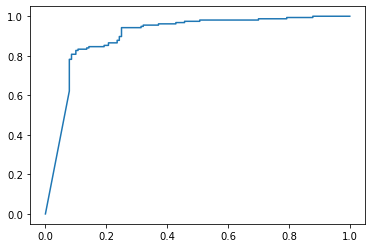

In [241]:
plt.plot(fpr,tpr)
plt.show()